In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

In [2]:
DATA_FILE = '../stanford-tensorflow-tutorials/data/fire_theft.xls'

# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1
print(n_samples)

42


In [3]:
# Create placeholder for X (Number of Fire) and Y (Number of Theft)
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

In [4]:
# Create weight and bias initialized to 0
w2 = tf.Variable(0.0, name="w2")
w1 = tf.Variable(0.0, name="w1")
b = tf.Variable(0.0, name="b")

In [5]:
# Construct model to predict Y (Number of Theft)
Y_predicted = X * X * w2 + X * w1 + b

In [7]:
def huber_loss(labels, predictions, delta=1.0):
    residual = tf.abs(predictions - labels)
    def f1(): return 0.5 * tf.square(residual)
    def f2(): return delta * residual - 0.5 * tf.square(delta)
    return tf.cond(residual < delta, f1, f2)

In [9]:
# Calculated squared error as loss
#loss = tf.square(Y - Y_predicted, name = "loss")
loss = huber_loss(Y, Y_predicted)

In [10]:
# Use Gradient Descent with learning rate=0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0000001)

In [11]:
lossOptimizer = optimizer.minimize(loss)

In [12]:
def run_model():
    # run the model
    with tf.Session() as sess:
        # Initialize necessary variables, in this case w and b
        sess.run(tf.global_variables_initializer())

        writer = tf.summary.FileWriter('./graphs', sess.graph)

        # train the model
        for i in range(100): # run 100 epochs
            total_loss = 0
            for x,y in data:
                # session runs train_op to minimize loss
                _, l = sess.run([lossOptimizer, loss], {X:x, Y:y})
                print(l)
                total_loss += l
            print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

        w2_value, w1_value, b_value= sess.run([w2, w1, b])

    return w2_value, w1_value, b_value

In [13]:
w2_value, w1_value, b_value = run_model()

28.5
43.4996
35.4986
36.4986
52.4978
67.4566
74.4813
17.4921
30.4909
24.4598
33.3316
13.4986
10.4907
10.4988
21.4982
15.4953
26.4915
8.49855
28.4847
29.4318
39.4123
31.3817
39.9986
145.69
21.2699
28.1166
45.3866
22.4755
3.12986
30.1144
38.4291
14.4885
31.4778
25.7763
31.207
33.3724
16.4882
45.3565
41.3866
42.381
33.3774
18.4754
Epoch 0: 33.0425422078
28.4589
43.4035
35.3811
36.4353
52.4189
66.2223
74.3525
17.4412
30.434
24.2173
32.4325
13.4933
10.456
10.4945
21.4914
15.4782
26.4603
8.49329
28.4294
29.1893
39.1229
31.0219
38.6078
144.018
20.9062
27.5399
45.2282
22.442
2.625
29.6187
38.3427
14.4745
31.451
24.9079
30.8852
33.2364
16.4757
45.2058
41.2692
42.2591
33.2532
18.4507
Epoch 1: 32.7744092147
28.4178
43.3073
35.2637
36.3721
52.3401
64.9881
74.2237
17.3904
30.3771
23.9749
31.5335
13.4881
10.4212
10.4901
21.4846
15.461
26.4291
8.48804
28.374
28.9468
38.8335
30.6621
37.217
142.345
20.5425
26.9633
45.0698
22.4084
2.12015
29.1231
38.2564
14.4606
31.4242
24.0394
30.5634
33.1005
16.4633
4

8.38016
27.2374
23.9661
32.888
23.2709
8.64726
107.988
13.0708
15.1182
41.8158
21.7194
7.25046
18.9861
36.4907
14.1756
30.8768
6.27779
23.9816
30.3202
16.2089
41.9724
38.7504
39.6437
30.5888
17.9212
Epoch 24: 27.3727263042
27.5367
41.2444
32.7449
35.0151
50.6485
38.5112
71.4599
16.2999
29.157
18.7734
12.2469
13.3754
9.67587
10.3968
21.3396
15.0925
25.7598
8.37538
27.187
23.7453
32.6245
22.9434
7.38115
106.466
12.7397
14.5933
41.6716
21.6889
7.71005
18.5349
36.4121
14.1629
30.8524
5.4872
23.6886
30.1964
16.1976
41.8351
38.6435
39.5327
30.4757
17.8988
Epoch 25: 27.150517668
27.4993
41.1568
32.638
34.9575
50.5767
37.3876
71.3426
16.2536
29.1052
18.5526
11.4284
13.3706
9.64424
10.3928
21.3334
15.0769
25.7314
8.37059
27.1366
23.5246
32.361
22.6158
6.11505
104.943
12.4086
14.0684
41.5274
21.6584
8.16964
18.0837
36.3335
14.1503
30.828
4.69662
23.3956
30.0727
16.1863
41.6979
38.5366
39.4217
30.3627
17.8763
Epoch 26: 26.9283092363
27.4619
41.0693
32.5311
34.8999
50.505
36.2641
71.2253
16.2073
2

39.7712
37.0356
37.8631
28.7749
17.5604
Epoch 47: 24.5941489813
26.9364
39.8398
31.0301
34.0909
49.4967
20.4962
69.5783
15.5571
28.326
15.233
0.0708557
13.299
9.17186
10.3335
21.2413
14.8432
25.3072
8.29898
26.3846
20.2317
28.4305
17.7298
11.7661
82.651
7.55926
6.38145
39.4149
21.2106
14.8999
11.4762
35.1817
13.964
30.4706
5.87944
19.1546
28.2806
16.0219
39.711
36.9886
37.8143
28.7252
17.5505
Epoch 48: 24.5483070463
26.9199
39.8013
30.9832
34.0656
49.4651
20.0037
69.5268
15.5368
28.3033
15.1362
0.270273
13.2971
9.15894
10.3318
21.2387
14.8368
25.2956
8.29701
26.3641
20.1418
28.3232
17.5965
12.2812
82.0316
7.42446
6.16781
39.3561
21.1981
15.087
11.2926
35.1497
13.9589
30.4606
6.20112
19.0353
28.2301
16.0173
39.6551
36.9451
37.7691
28.6791
17.5413
Epoch 49: 24.5089343517
26.9046
39.7656
30.9396
34.0421
49.4359
19.5466
69.479
15.5179
28.2822
15.0463
0.56823
13.2952
9.14675
10.3303
21.2363
14.8307
25.2846
8.29515
26.3447
20.057
28.222
17.4707
12.7669
81.4477
7.29734
5.96636
39.3007
21.1863

10.2979
21.1861
14.7039
25.0547
8.2561
25.9375
18.2768
26.0975
14.83
22.9656
69.1839
4.62793
1.73591
38.1372
20.9392
18.9675
7.48272
34.4847
13.851
30.2538
12.8742
16.5608
27.1838
15.9209
38.4951
36.0412
36.8306
27.723
17.3506
Epoch 71: 23.7864628065
26.5877
39.0251
30.0357
33.5546
48.8284
10.0645
68.4873
15.1259
27.8437
13.1814
7.47634
13.2543
8.87859
10.2963
21.1838
14.6978
25.0437
8.25424
25.9181
18.1921
25.9963
14.7043
23.4513
68.5999
4.50082
1.53446
38.0818
20.9274
19.1439
7.30954
34.4545
13.8461
30.2444
13.1775
16.4483
27.1362
15.9165
38.4424
36.0001
36.7879
27.6796
17.342
Epoch 72: 23.7536885171
26.5733
38.9914
29.9946
33.5325
48.8008
9.63353
68.4423
15.1081
27.8238
13.0966
7.79035
13.2524
8.8664
10.2948
21.1814
14.6918
25.0328
8.25239
25.8987
18.1073
25.8951
14.5786
23.9369
68.0159
4.3737
1.33301
38.0263
20.9157
19.3203
7.13637
34.4243
13.8412
30.235
13.4809
16.3358
27.0887
15.9121
38.3897
35.959
36.7452
27.6361
17.3333
Epoch 73: 23.7209145228
26.5589
38.9577
29.9535
33.5103
48

48.2504
1.04733
67.5438
14.7529
27.4264
11.4074
14.046
13.2153
8.62329
10.2639
21.1336
14.5712
24.8144
8.21521
25.5121
16.418
23.8792
12.073
33.6118
56.3823
1.84089
1.6806
36.9383
20.6844
22.783
3.73677
33.8306
13.7447
30.0503
19.4348
14.1275
26.1547
15.826
37.3543
35.1521
35.9074
26.7826
17.1629
Epoch 97: 23.1726680256
26.2759
38.2966
29.1466
33.075
48.2308
0.742729
67.5119
14.7403
27.4123
11.3474
14.268
13.2139
8.61465
10.2628
21.1319
14.567
24.8066
8.21389
25.4984
16.3581
23.8076
11.9841
33.955
55.9697
1.75102
1.823
36.8991
20.676
22.9077
3.61436
33.8092
13.7412
30.0436
19.6492
14.048
26.121
15.8228
37.317
35.123
35.8772
26.7519
17.1568
Epoch 98: 23.1562675067
26.2657
38.2728
29.1175
33.0593
48.2113
0.440061
67.4809
14.728
27.3986
11.2891
14.4838
13.2127
8.60625
10.2618
21.1303
14.5628
24.7991
8.2126
25.485
16.2998
23.738
11.8976
34.2887
55.5683
1.66362
1.96148
36.861
20.6679
23.029
3.4953
33.7884
13.7378
30.0372
19.8577
13.9706
26.0883
15.8198
37.2807
35.0947
35.8479
26.722
17.1508

In [14]:
print(w2_value)
print(w1_value)
print(b_value)

0.0577816
0.00367203
0.000360797


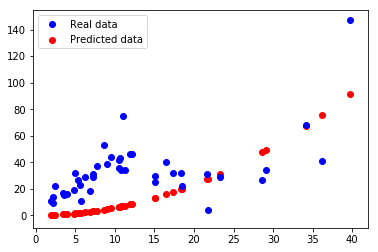

In [15]:
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.scatter(X, X * X  * w2_value + X * w1_value + b_value, color='r', label='Predicted data')
plt.legend()
plt.show()

By reusing the exact code as in linear model the model returns nan. 
By investigating and printing loss value at each record I noticed that in the beginning we have loss but it keeps increasing. Tried smaller and larger loss, no help; smaller loss seemed to work for a few more samples but nothing significant. By looking at this https://stackoverflow.com/questions/45177800/gradient-descent-isnt-working I noticed that loss should be MUCH MUCH smaller than linear model.
![title](img/exploding_loss.jpg)
